In [53]:
import pandas as pd

df = pd.read_csv("/Users/stephanieijere/Documents/data_science/AI assignemts/Fake News Detector/data/FakeNewsNet.csv")


#To get a quick look at the dataset
print(df.head())
print(df.shape)

#To get information about the data
df.info()

#Summary statistics 
df.describe()

                                               title  \
0  Kandi Burruss Explodes Over Rape Accusation on...   
1  People's Choice Awards 2018: The best red carp...   
2  Sophia Bush Sends Sweet Birthday Message to 'O...   
3  Colombian singer Maluma sparks rumours of inap...   
4  Gossip Girl 10 Years Later: How Upper East Sid...   

                                            news_url        source_domain  \
0  http://toofab.com/2017/05/08/real-housewives-a...           toofab.com   
1  https://www.today.com/style/see-people-s-choic...        www.today.com   
2  https://www.etonline.com/news/220806_sophia_bu...     www.etonline.com   
3  https://www.dailymail.co.uk/news/article-33655...  www.dailymail.co.uk   
4  https://www.zerchoo.com/entertainment/gossip-g...      www.zerchoo.com   

   tweet_num  real  
0         42     1  
1          0     1  
2         63     1  
3         20     1  
4         38     1  
(23196, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries

,tweet_num,real
count,23196.000000,23196.000000
mean,88.956803,0.751897
std,488.694592,0.431921
min,0.000000,0.000000
25%,11.000000,1.000000
50%,37.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


In [ ]:
#Missing values check
print(df.isnull().sum())

#To count how many fake news
df["real"].value_counts()

# Fill missing values in title with "Unknown"
df["title"] = df["title"].fillna("Unknown")
print(df["title"].isnull().sum())

df["source_domain"] = df["source_domain"].fillna("Unknown")
print(df["source_domain"].isnull().sum())

df["tweet_num"] = df["tweet_num"].fillna(df["tweet_num"].median())
print(df["source_domain"].isnull().sum())
print(df.info)


title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64
0
0
0
<bound method DataFrame.info of                                                    title  \
0      Kandi Burruss Explodes Over Rape Accusation on...   
1      People's Choice Awards 2018: The best red carp...   
2      Sophia Bush Sends Sweet Birthday Message to 'O...   
3      Colombian singer Maluma sparks rumours of inap...   
4      Gossip Girl 10 Years Later: How Upper East Sid...   
...                                                  ...   
23191  Pippa Middleton wedding: In case you missed it...   
23192  Zayn Malik & Gigi Hadid’s Shocking Split: Why ...   
23193  Jessica Chastain Recalls the Moment Her Mother...   
23194  Tristan Thompson Feels "Dumped" After Khloé Ka...   
23195  Kelly Clarkson Performs a Medley of Kendrick L...   

                                                news_url  \
0      http://toofab.com/2017/05/08/real-housewives-a...   
1  

In [38]:
#check for duplicates
df.duplicated().sum()
df = df.drop_duplicates()
print("The number of duplicated rows after is: ", df.duplicated().sum())

#Count how many times a domain appeared
domain_counts = df["source_domain"].value_counts()
df["domain_popularity"] = df["source_domain"].map(domain_counts)
print(domain_counts)

# Sort the dataset by tweet_num in descending order
top_tweeted = df.sort_values(by="tweet_num", ascending=False)

# Show the top 10 most tweeted articles
top_tweeted[["title", "tweet_num", "source_domain", "real"]].head(10)



The number of duplicated rows after is:  0
source_domain
people.com                1779
www.dailymail.co.uk        957
en.wikipedia.org           734
www.usmagazine.com         704
www.etonline.com           659
                          ... 
www.wthr.com                 1
www.hot1061.com              1
www.thegoodteatime.com       1
fashionweekdaily.com         1
www.pbteen.com               1
Name: count, Length: 2442, dtype: int64


,title,tweet_num,source_domain,real
11489,The Legislative Process,29060,www.house.gov,0
21215,One in Four – Congressman Joe Pitts – Medium,27377,medium.com,1
9505,Rep. Michael McCaul (R-TX) Appears on Face the...,21182,us3.campaign-archive1.com,1
21088,"Outlook, Office, Skype, Bing, Breaking News, a...",19863,www.msnbc.msn.com,1
3379,interview on Fox News,17746,www.cq.com,1
18042,Wake Up America,17548,www.facebook.com,0
7788,"""One Hundred Percent"" by Club for Growth Action",14885,www.youtube.com,1
13246,"Carolyn B. Maloney on Twitter: ""Women's health...",14152,twitter.com,1
3370,LexisNexis(R) Publisher,12741,web.archive.org,1
9675,Democratic National Convention,11714,web.archive.org,1


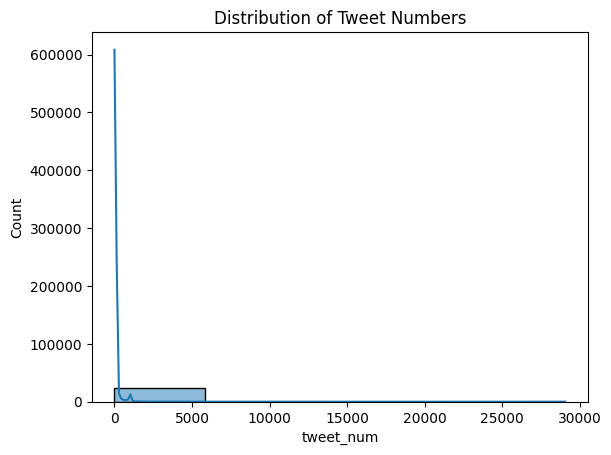

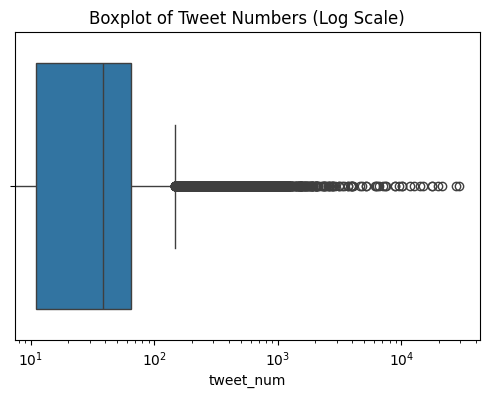

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#To check distribution of tweet numbers
sns.histplot(df["tweet_num"], bins=5, kde=True)
plt.title("Distribution of Tweet Numbers")
plt.show()

#This clearly has outliers, so I'd use a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["tweet_num"])
plt.xscale("log")
plt.title("Boxplot of Tweet Numbers (Log Scale)")
plt.show()

  # log(1 + x) to handle zeros





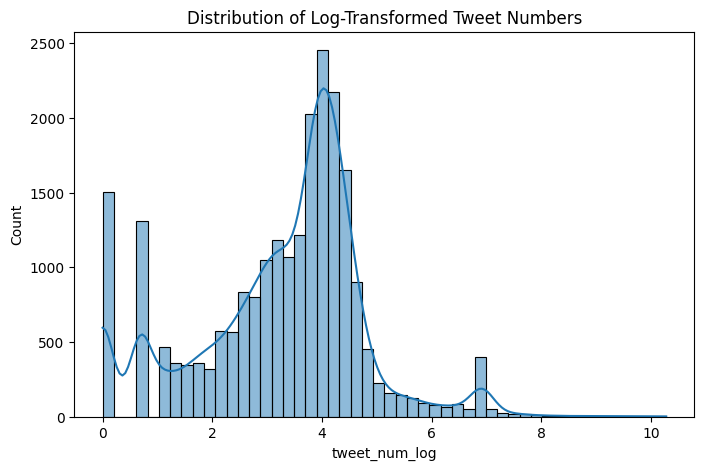

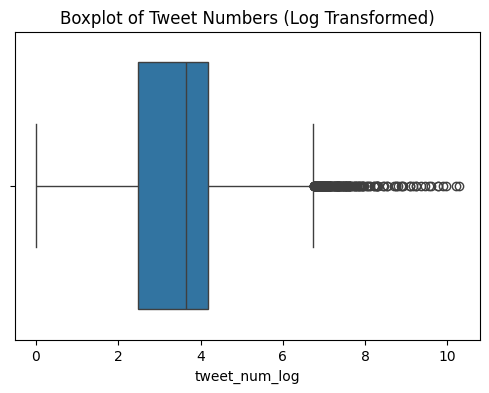

In [63]:
import numpy as np

df["tweet_num_log"] = np.log1p(df["tweet_num"])

plt.figure(figsize=(8,5))
sns.histplot(df["tweet_num_log"], bins=50, kde=True)
plt.title("Distribution of Log-Transformed Tweet Numbers")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["tweet_num_log"])
plt.title("Boxplot of Tweet Numbers (Log Transformed)")
plt.show()

/var/folders/55/vkj6dwkx61q4mjzsqhg0fzpm0000gp/T/ipykernel_23534/1273997076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="real", data=df, palette="Set2")


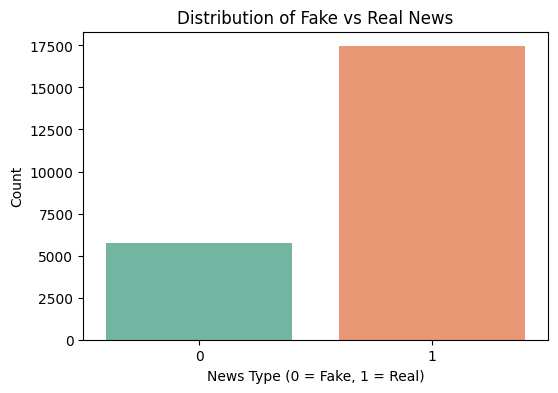

real
1    75.189688
0    24.810312
Name: proportion, dtype: float64


In [62]:
#To check how many fake news exists

plt.figure(figsize=(6,4))
sns.countplot(x="real", data=df, palette="Set2")
plt.title("Distribution of Fake vs Real News")
plt.xlabel("News Type (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.show()

print(df["real"].value_counts(normalize=True)*100)


/var/folders/55/vkj6dwkx61q4mjzsqhg0fzpm0000gp/T/ipykernel_23534/2687371185.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_real.values, y=domain_real.index, palette="viridis")


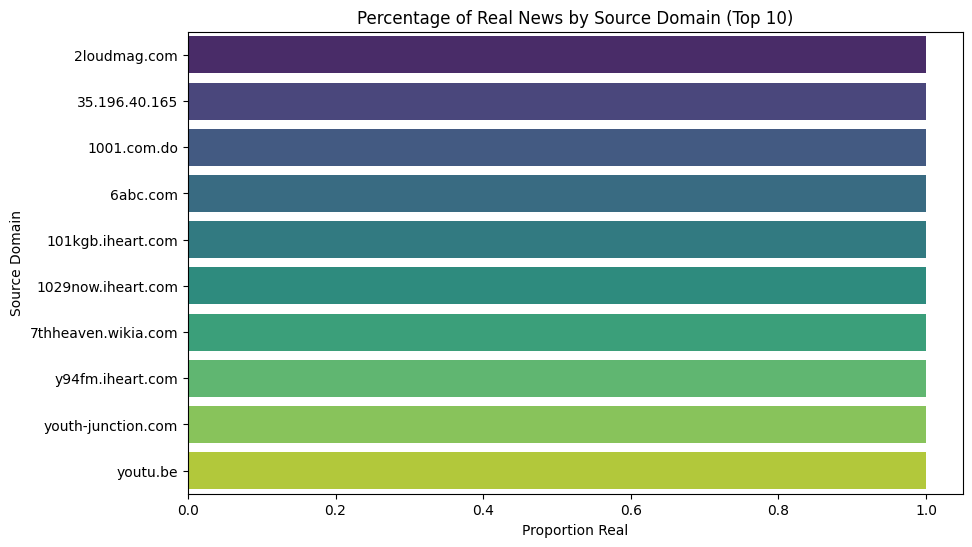

In [ ]:
#Fake news versus Real news by domain
#This barplot is concerning because all top 10 domains show proportion values at or very close to 1.0 (100% real news), which is unusual and suspicious.
plt.figure(figsize=(10,6))
domain_real = df.groupby("source_domain")["real"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=domain_real.values, y=domain_real.index, palette="viridis")
plt.title("Percentage of Real News by Source Domain (Top 10)")
plt.xlabel("Proportion Real")
plt.ylabel("Source Domain")
plt.show()


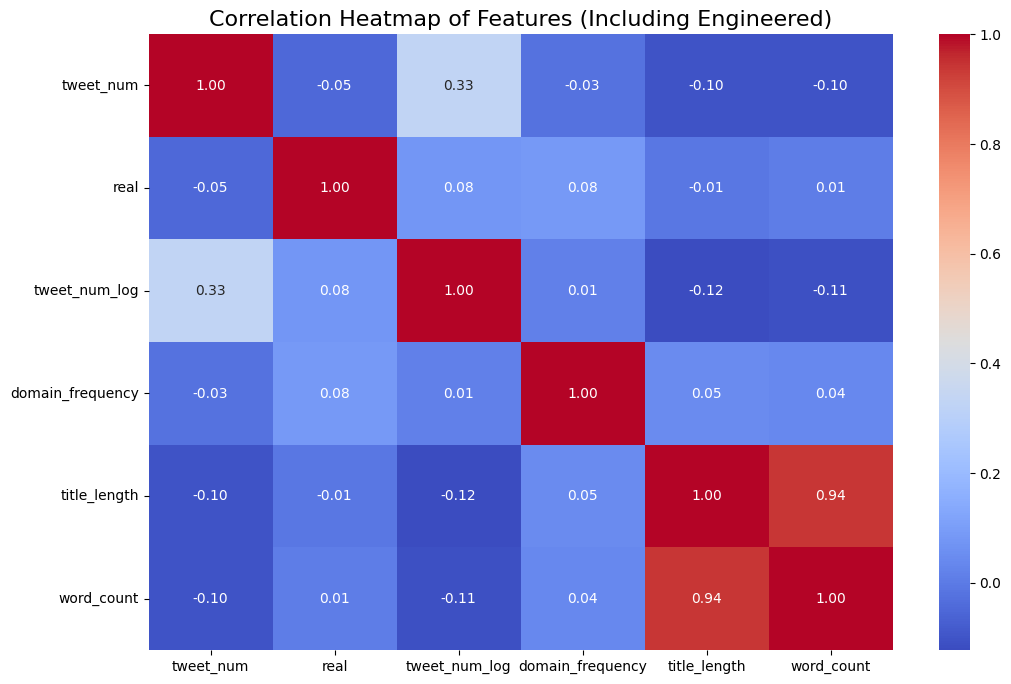

Correlation of features with target (real):

real                1.000000
domain_frequency    0.084123
tweet_num_log       0.077443
word_count          0.007946
title_length       -0.013036
tweet_num          -0.051411
Name: real, dtype: float64


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (ignores text like url/title)
# Frequency encoding for source_domain
df['domain_frequency'] = df['source_domain'].map(df['source_domain'].value_counts())

# Title-based features
df['title_length'] = df['title'].fillna("").apply(len)
df['word_count'] = df['title'].fillna("").apply(lambda x: len(x.split()))

# --- Select numeric columns (original + engineered) ---
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# --- Compute correlation matrix ---
corr = numeric_df.corr()

# --- Plot full heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features (Including Engineered)", fontsize=16)
plt.show()

# --- Show correlation of features with the target ---
corr_with_target = corr['real'].sort_values(ascending=False)
print("Correlation of features with target (real):\n")
print(corr_with_target)


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# 2. Features and target

# From title
df["title_length"] = df["title"].apply(lambda x: len(str(x)))
df["word_count"] = df["title"].apply(lambda x: len(str(x).split()))
df["exclamation_count"] = df["title"].str.count("!")
df["question_count"] = df["title"].str.count("\?")

# From domain
df["domain_freq"] = df.groupby("source_domain")["source_domain"].transform("count")
df["is_rare_domain"] = (df["domain_freq"] < 5).astype(int)


#text features
tfidf = TfidfVectorizer(max_features=500, stop_words="english")
X_tfidf = tfidf.fit_transform(df["title"])

numeric_features = df[[
    "tweet_num_log", "title_length", "word_count",
    "exclamation_count", "question_count", "domain_freq", "is_rare_domain"
]]

X = hstack([numeric_features, X_tfidf])  # combine numeric + text
y = df["real"]
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predictions
y_pred1 = model.predict(X_test)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))


<>:12: SyntaxWarning: invalid escape sequence '\?'
<>:12: SyntaxWarning: invalid escape sequence '\?'
/var/folders/55/vkj6dwkx61q4mjzsqhg0fzpm0000gp/T/ipykernel_23534/2405588029.py:12: SyntaxWarning: invalid escape sequence '\?'
  df["question_count"] = df["title"].str.count("\?")


Accuracy: 0.802801724137931
Confusion Matrix:
 [[ 347  784]
 [ 131 3378]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.31      0.43      1131
           1       0.81      0.96      0.88      3509

    accuracy                           0.80      4640
   macro avg       0.77      0.63      0.66      4640
weighted avg       0.79      0.80      0.77      4640



/Users/stephanieijere/Documents/data_science/AI assignemts/Fake News Detector/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


# Feature Engineering... Fine tuning the previous model training for better accuracy
# From title
# some fake news has clickbaity long or short titles. Its a stylish indicator of fake vs real.
df["title_length"] = df["title"].apply(lambda x: len(str(x)))
df["word_count"] = df["title"].apply(lambda x: len(str(x).split()))
df["exclamation_count"] = df["title"].str.count("!")
df["question_count"] = df["title"].str.count("\?")

# From domain
# how often a domain appears is being used to train the model because trusted domains tend to publish more real news
df["domain_freq"] = df.groupby("source_domain")["source_domain"].transform("count")
df["is_rare_domain"] = (df["domain_freq"] < 5).astype(int)

# Text Features (TF-IDF)
tfidf = TfidfVectorizer(max_features=500, stop_words="english")
X_tfidf = tfidf.fit_transform(df["title"].astype(str))


# Combine Numeric + Text
numeric_features = df[[
    "tweet_num_log", "title_length", "word_count",
    "exclamation_count", "question_count", "domain_freq", "is_rare_domain"
]]

# Convert numeric to sparse before stacking
X_num = csr_matrix(numeric_features.values)

# Combine sparse matrices
X = hstack([X_num, X_tfidf])
y = df["real"]


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Train Logistic Regression

model = LogisticRegression(max_iter=5000)  # allow more iterations for convergence
model.fit(X_train, y_train)


# 6. Predictions & Evaluation
y_pred2 = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

<>:14: SyntaxWarning: invalid escape sequence '\?'
<>:14: SyntaxWarning: invalid escape sequence '\?'
/var/folders/55/vkj6dwkx61q4mjzsqhg0fzpm0000gp/T/ipykernel_23534/912939690.py:14: SyntaxWarning: invalid escape sequence '\?'
  df["question_count"] = df["title"].str.count("\?")


Accuracy: 0.8241379310344827

Confusion Matrix:
 [[ 500  631]
 [ 185 3324]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.44      0.55      1131
           1       0.84      0.95      0.89      3509

    accuracy                           0.82      4640
   macro avg       0.79      0.69      0.72      4640
weighted avg       0.81      0.82      0.81      4640



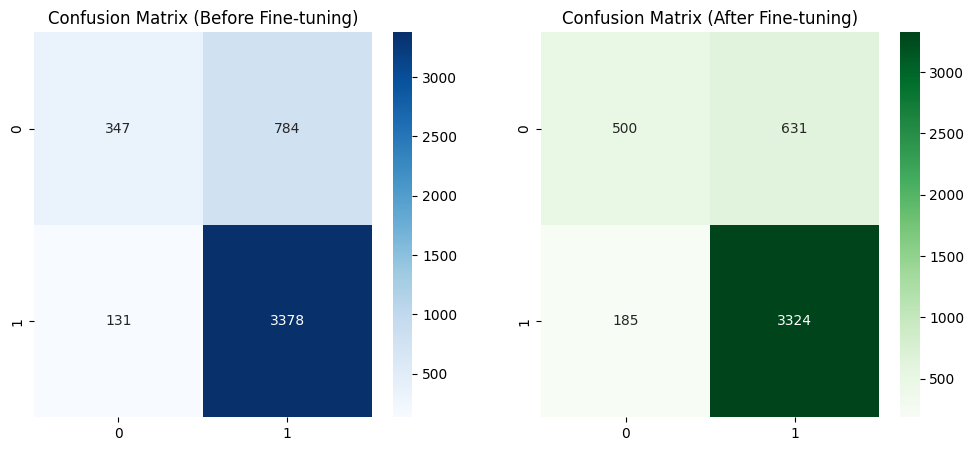

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#This comparison shows that fine tuning significantly improved the model's ability to correctly identify fake vs real news, making it much more reliable for practical fake news detection applications.
cm1 = confusion_matrix(y_test, y_pred1)  # from first code
cm2 = confusion_matrix(y_test, y_pred2)  # from second code

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Before Fine-tuning)")

sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix (After Fine-tuning)")

plt.show()


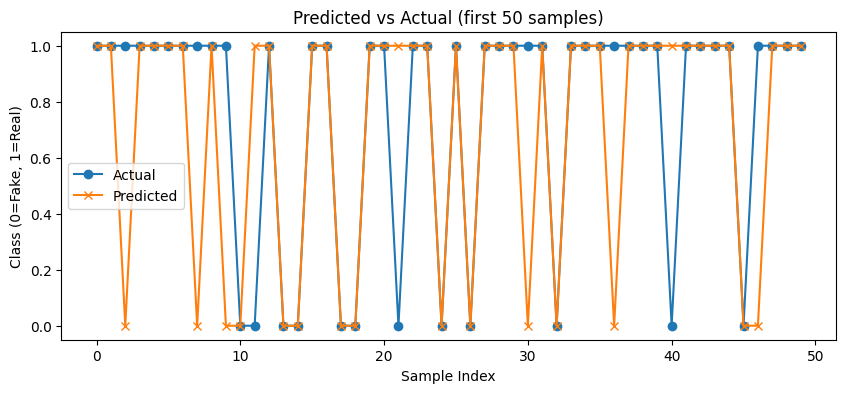

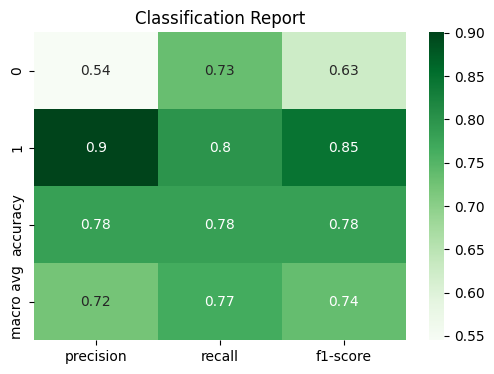

In [ ]:
# Compare predictions with actual values
#The predictions show that the model is doing good overall
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).reset_index(drop=True)

plt.figure(figsize=(10,4))
plt.plot(comparison_df.index[:50], comparison_df["Actual"][:50], label="Actual", marker="o")
plt.plot(comparison_df.index[:50], comparison_df["Predicted"][:50], label="Predicted", marker="x")
plt.title("Predicted vs Actual (first 50 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0=Fake, 1=Real)")
plt.legend()
plt.show()


#The classification report shows that the model is much better at identifying class 1 than class 0.

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T

plt.figure(figsize=(6,4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Greens")
plt.title("Classification Report")
plt.show()
